## Import All Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D, BatchNormalization,Dropout,Input
from keras.models import Sequential
from keras.applications import MobileNetV2

from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Image Data and Preprocessing

### Class Labels

In [2]:
class_labels = {'glioma':0, 'meningioma':1, 'notumor':2, 'pituitary':3}
class_labels

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Image Preprocessing on Train

In [8]:
path = "/kaggle/input/brain-tumor-mri-dataset/Training"
image_data = []
label_data = []
for label in os.listdir(path):
    #print(label)  # pituitary
    path1 = os.path.join(path,label)
    #print(path1)   # /kaggle/input/brain-tumor-mri-dataset/Training/pituitary
    for j in os.listdir(path1):
        #print(j)   # Tr-pi_0532.jpg
        image = Image.open(path1+"/"+j)
        image = image.convert("RGB")
        image = image.resize((224,224))
        image = np.array(image)
        image_data.append(image)
        label_data.append(class_labels[label])
        #print(image)

## Image Preprocessing on Test

In [ ]:
path = "/kaggle/input/brain-tumor-mri-dataset/Testing"
image_data1 = []
label_data1 = []
for label in os.listdir(path):
    #print(label)  # pituitary
    path1 = os.path.join(path,label)
    #print(path1)   # /kaggle/input/brain-tumor-mri-dataset/Training/pituitary
    for j in os.listdir(path1):
        #print(j)   # Tr-pi_0532.jpg
        image = Image.open(path1+"/"+j)
        image = image.convert("RGB")
        image = image.resize((224,224))
        image = np.array(image)
        image_data1.append(image)
        label_data1.append(class_labels[label])
        #print(image)

In [ ]:
print(len(image_data))
print(len(label_data))
print(len(image_data1))
print(len(label_data1))

In [ ]:
image_data[0]

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_data_generator = datagen.flow_from_directory(
    "/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    #subset='training',  # Specify 'training' to get the training set
    shuffle=True
)

test_data_generator = datagen.flow_from_directory(
    "/kaggle/input/brain-tumor-mri-dataset/Testing",
    target_size=(224,224),
    batch_size=32,
    class_mode='sparse',
    #subset='validation',  # Specify 'validation' to get the validation set
    shuffle=True
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
train_data_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Image Visualization With Labels

In [7]:
#class_labels = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
class_labels_list = ['glioma', 'meningioma', 'notumor', 'pituitary']

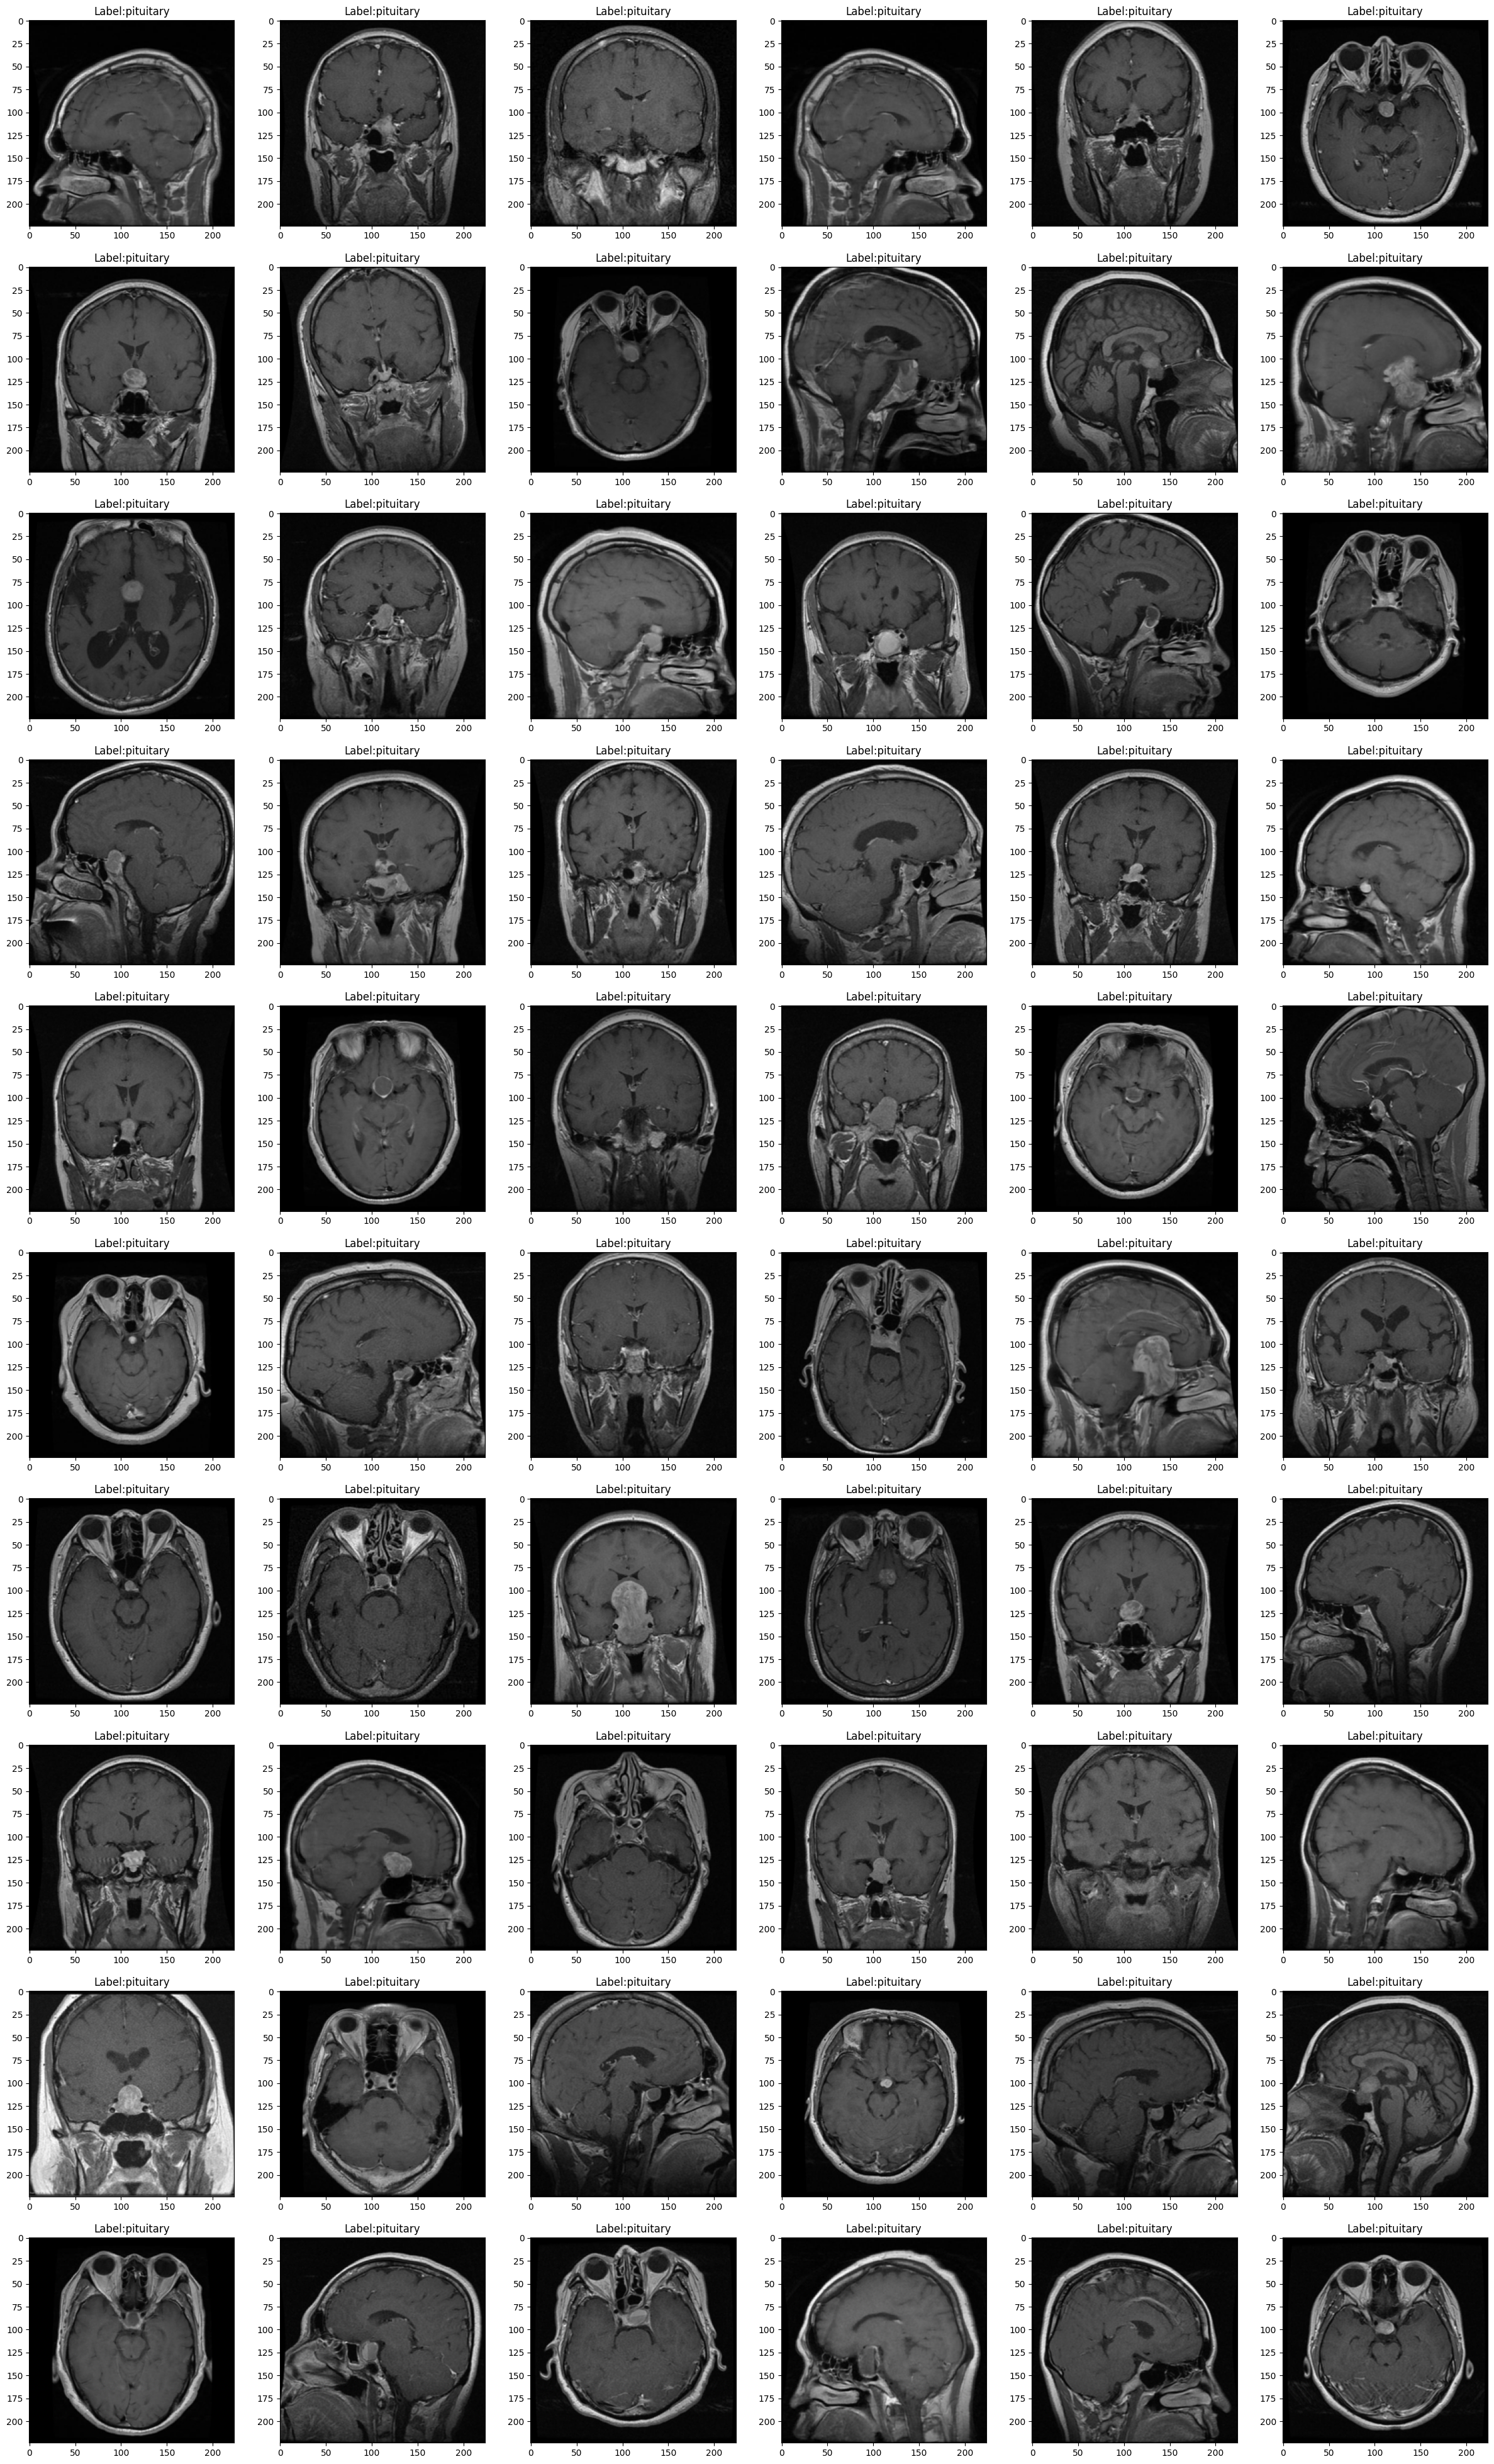

In [9]:
plt.figure(figsize=(30,50))
i=1
for img,label in zip(image_data[:60],label_data[:60]):
    plt.subplot(10,6,i)
    plt.imshow(img)
    plt.title(f"Label:{class_labels_list[label]}")
    i+=1

In [ ]:
# data = image_data + image_data1
# label = label_data + label_data1
# print(len(data))
# print(len(label))

In [ ]:
# x = np.array(data)
# y = np.array(label)

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.005)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# x_train_scaled = x_train/255
# x_test_scaled = x_test/255

In [ ]:
# set(y_train)

## Build Model

In [10]:
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1),padding='valid'))

model.add(Conv2D(filters=96,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1),padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1),padding='valid'))


model.add(Flatten())
model.add(Dense(120,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(120,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 221, 221, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 219, 219, 96)      110688    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 218, 218, 96)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 216, 216, 64)      55360     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 215, 215, 64)      0

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.optimizers import Adam

# # Load pre-trained MobileNetV2 model without the top (fully connected) layers
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Create a sequential model
# model = Sequential()

# # Add the pre-trained base model
# model.add(base_model)

# # Add custom dense layers for binary classification
# #model.add(GlobalAveragePooling2D())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='softmax')) 

# # Freeze the layers of the pre-trained model
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
# model.summary()

In [11]:
history = model.fit(train_data_generator, batch_size=32,
                    epochs=5,
                    validation_data=test_data_generator)

Epoch 1/5
179/179 [==============================] - 145s 679ms/step - loss: 1.3806 - accuracy: 0.5390 - val_loss: 0.8165 - val_accuracy: 0.6461
Epoch 2/5
179/179 [==============================] - 104s 577ms/step - loss: 0.6500 - accuracy: 0.7479 - val_loss: 0.6601 - val_accuracy: 0.7490
Epoch 3/5
179/179 [==============================] - 103s 576ms/step - loss: 0.5322 - accuracy: 0.7922 - val_loss: 0.6858 - val_accuracy: 0.7323
Epoch 4/5
179/179 [==============================] - 103s 574ms/step - loss: 0.4489 - accuracy: 0.8305 - val_loss: 0.4996 - val_accuracy: 0.7971
Epoch 5/5
179/179 [==============================] - 103s 574ms/step - loss: 0.3995 - accuracy: 0.8505 - val_loss: 0.4732 - val_accuracy: 0.8047


In [ ]:
model.save("Brain_Tumor_Model.h5")

In [ ]:
from keras.models import load_model

model1 =  load_model("/kaggle/working/Brain_Tumor_Model.h5")

In [14]:
loss,acc = model.evaluate(test_data_generator)
print("Accuracy on Test Data:",acc)

loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

41/41 [==============================] - 19s 459ms/step - loss: 0.4641 - accuracy: 0.8177
Accuracy on Test Data: 0.8176963925361633
179/179 [==============================] - 81s 450ms/step - loss: 0.3709 - accuracy: 0.8654
Accuracy on Train Data: 0.8653711676597595


In [17]:
y_pred = model.predict(test_data_generator)
y_pred = [np.argmax(i) for i in y_pred]

41/41 [==============================] - 18s 438ms/step


In [24]:
for i,l in test_data_generator:
    print(l)
    break
    

[3. 3. 2. 0. 0. 1. 3. 2. 1. 2. 1. 1. 3. 2. 1. 2. 0. 2. 3. 1. 1. 1. 2. 2.
 0. 1. 1. 2. 2. 2. 0. 0.]


In [25]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))